In [1]:
#in local environment you may need to install ipywidgets first

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from ipywidgets import interact, IntSlider

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0) #change random_state=None for truly random data.

def kmeans_animation(n_clusters):
    fig, ax = plt.subplots()

    # Initialize centroids randomly
    centroids = X[np.random.choice(len(X), size=n_clusters)]

    def animate(i):
        nonlocal centroids

        # Assign each data point to the closest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        # Calculate new centroids as the mean of the current clusters
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        ax.clear()
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)

        # Plot the centroids
        ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
        for (j, k), (l, m) in zip(centroids, new_centroids):
            ax.arrow(j, k, l-j, m-k, color='red', width=0.02)

        centroids = new_centroids

    anim = FuncAnimation(fig, animate, frames=20, interval=500) #the loop is controlled by the frames parameter
    plt.close(fig)
    
    return HTML(anim.to_jshtml())

interact(kmeans_animation, n_clusters=IntSlider(value=4, min=2, max=10, step=1, description='n_clusters:'));

interactive(children=(IntSlider(value=4, description='n_clusters:', max=10, min=2), Output()), _dom_classes=('…

In [2]:
import numpy as np

X = np.array([[7.29, 2.75],
              [6.20, 2.68],
              [5.39, 2.27],
              [5.67, 2.96],
              [6.60, 3.07],
              [7.76, 3.16],
              [6.63, 3.15],
              [5.77, 3.14],
              [5.99, 2.76],
              [6.38, 2.65],
              [5.74, 3.10],
              [4.62, 2.79],
              [5.34, 3.04],
              [5.37, 2.82],
              [5.04, 2.92],
              [5.53, 3.34],
              [6.05, 2.81],
              [5.13, 2.20],
              [5.73, 2.88],
              [6.78, 3.06],
              [6.45, 3.35],
              [6.40, 2.90],
              [5.86, 3.00],
              [6.45, 3.17],
              [5.37, 3.20],
              [5.89, 3.35],
              [3.96, 2.72],
              [6.28, 3.17],
              [4.21, 2.82],
              [5.33, 3.03]])

print('The shape of X is:', X.shape)

The shape of X is: (30, 2)


In [3]:
initial_centroids = np.array([[5.39, 2.27], [5.53, 3.34]])

print('The shape of initial centroids is:', initial_centroids.shape)

The shape of initial centroids is: (2, 2)


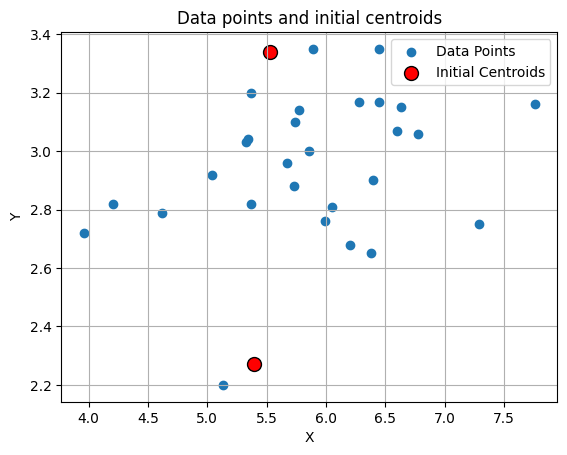

In [4]:
import matplotlib.pyplot as plt

# Data points
plt.scatter(X[:, 0], X[:, 1], label='Data Points')

# Initial centroids
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], 
            color='red', s=100, edgecolor='k', label='Initial Centroids')

plt.title('Data points and initial centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """

    K = centroids.shape[0] 

    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
      distance = []
      for j in range(centroids.shape[0]):
        norm_ij = np.linalg.norm(X[i] - centroids[j])
        distance.append(norm_ij)

      idx[i] = np.argmin(distance)

    return idx

In [7]:
# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print the closest centroids for the first three elements
print("The shape of idx is:", idx.shape[0])
print("First three elements in idx are:", idx[:3])
print("All elements in idx are:", idx)

The shape of idx is: 30
First three elements in idx are: [1 0 0]
All elements in idx are: [1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1]


In [8]:
def compute_centroids_means(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    m, n = X.shape

    centroids = np.zeros((K, n))

    for k in range(K):
      points = X[idx == k]
      centroids[k] = np.mean(points, axis = 0)

    return centroids

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines

def kMeans_progress(X, centroids, previous_centroids, idx, K, i):
    # Define colormap
    cmap = ListedColormap(["red", "blue"])
    c = cmap(idx)

    # Draw a line from the previous centroid to the current centroid
    for cent_idx in range(centroids.shape[0]):
        plt.plot([previous_centroids[cent_idx, 0], centroids[cent_idx, 0]], [previous_centroids[cent_idx, 1], centroids[cent_idx, 1]], '-k', linewidth=1)

    # Plot the examples
    plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.1, alpha=0.7)

    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    plt.title("Iteration number %d" % i)
    
    # Create a red circle for the Low Spenders legend entry
    red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Income-Sensitive')
    
    # Create a blue circle for the High Spenders legend entry
    blue_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Income-Insensitive')
    
    # Add legend
    plt.legend(handles=[red_circle, blue_circle])

def kMeans(X, initial_centroids, max_iters=5, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            kMeans_progress(X, centroids, previous_centroids, idx, K, i)
        
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids_means(X, idx, K)


    # Set the y-axis label
    plt.ylabel('Annual Spend in hundreds of dollars (x2)')
    # Set the x-axis label
    plt.xlabel('Annual Income in thousands of dollars (x1)')
    plt.show()
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


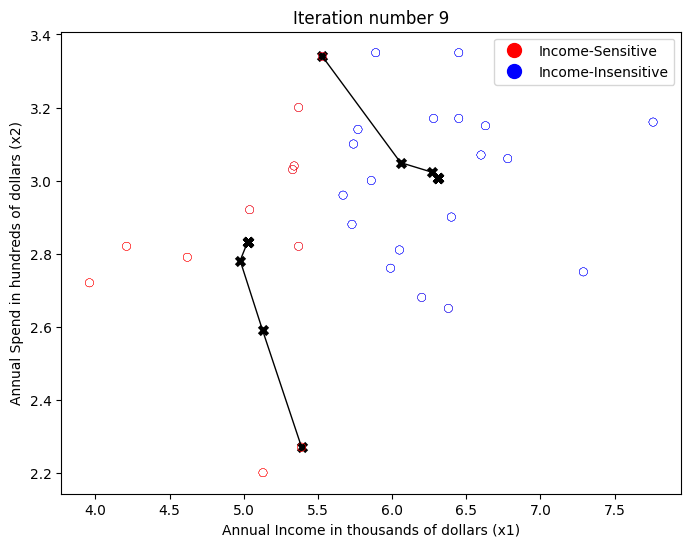

In [10]:
# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = kMeans(X, initial_centroids, max_iters, plot_progress=True)

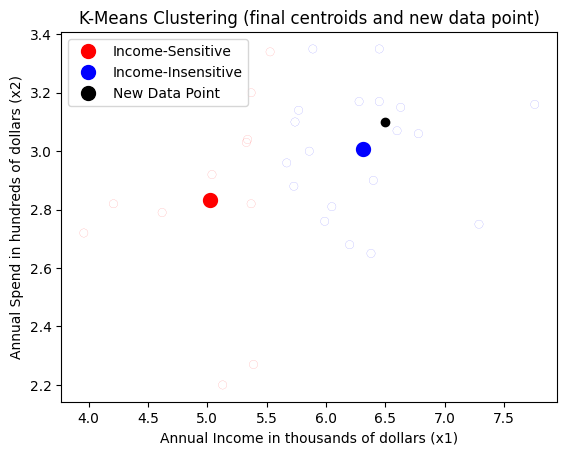

In [11]:
# Here's our new data
new_data = np.array([[6.5, 3.1]])

# Define colormap
cmap = ListedColormap(["red", "blue"])
c = cmap(idx)

# Plot the examples
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.1, alpha=0.7)

# Plot the new data point in black
plt.scatter(new_data[0, 0], new_data[0, 1], color='black')

# Plot the centroids as large dots, colored according to the data points
for i, centroid in enumerate(centroids):
    color = cmap(i)
    plt.scatter(centroid[0], centroid[1], marker='o', color=color, linewidths=5)

# Set the axis labels and title
plt.ylabel('Annual Spend in hundreds of dollars (x2)')
plt.xlabel('Annual Income in thousands of dollars (x1)')
plt.title('K-Means Clustering (final centroids and new data point)')

# Create a red circle for the Low Spenders legend entry
red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Income-Sensitive')

# Create a blue circle for the High Spenders legend entry
blue_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Income-Insensitive')

# Create a black circle for the new data point legend entry
black_circle = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=10, label='New Data Point')

# Add legend
plt.legend(handles=[red_circle, blue_circle, black_circle])

plt.show()

In [12]:
# Use the final centroids to find the closest centroid for the new data point
idx_new = find_closest_centroids(new_data, centroids)

print(f"The new data point belongs to cluster: {idx_new[0]}")

The new data point belongs to cluster: 1
